In [1]:
import matplotlib.pyplot as plt; import numpy as np; import pandas as pd
from IPython import display
import seaborn as sns
from ContributorCentricFunctions import *
%matplotlib inline

In [2]:
years = [2005+i for i in range(12)]
years

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [3]:
study_tiles = json.loads(open('study_tiles_with_compare_tiles.json','r').read())
print("Found {0} tiles.".format(len(study_tiles)))

Found 9 tiles.


# Study Tiles: Load data for a specific study tile

In [4]:
for idx, tile in enumerate(study_tiles):
    print(idx, tile['name'])

0 Port Au Prince, Haiti
1 Trisuli Bazar, Nepal
2 Tacloban
3 Kenema, Sierra Leone
4 Monrovia, Liberia
5 Kathmandu, Nepal
6 Heidelberg, Germany
7 London
8 Manhattan, NY


## 1. Get the `user_list` by setting the `study_tile_idx` to the appropriate study tile

In [6]:
study_tile_idx = 4

In [7]:
reset() #Safety for the db connections
study_tiles[study_tile_idx]['user_list'] = get_all_users_who_edited_tile(study_tiles[study_tile_idx])

2005 . 2006 . 2007 . 2008 . 2009 . 2010 . 2011 . 2012 . 2013 . 2014 . 2015 . 2016 . 

In [8]:
print("Found: {0} users".format(len(study_tiles[study_tile_idx]['user_list'])))

Found: 201 users


## 2. Build the User Distributions
If this doesn't run, run the cell 2 above again)

In [9]:
study_tiles[study_tile_idx]['users'] = build_user_distributions(study_tiles[study_tile_idx]['user_list'])
display.display(study_tiles[study_tile_idx]['users'][study_tiles[study_tile_idx]['user_list'][0]]['df'].head(2))

 788/ ~ 965

,quadkey,year,uid,buildings,road_km,amenities,edits,num_days,user_stats_uid,user_name,total_year,total_buildings,total_road_km,total_amenities,total_edits,total_active_days
0,031311303031,2007,1611,0,0.0,1,29,1,1611,Harry Wood,2007,12,188.38,275,7583,97
1,031311303030,2007,1611,0,0.0,0,1,1,1611,Harry Wood,2007,12,188.38,275,7583,97


## 3. Get tile focus for each user

In [10]:
process_dictionary_of_users(study_tiles[study_tile_idx]['users'])
display.display(study_tiles[study_tile_idx]['users'][study_tiles[study_tile_idx]['user_list'][0]]['tiles'].head(2))
display.display(study_tiles[study_tile_idx]['users'][study_tiles[study_tile_idx]['user_list'][0]]['annual'].head(2))

 201/201

,edits,amenities,road_km,num_days,buildings,percent_user_road_km,percent_user_buildings,percent_user_amenities,percent_user_edits
quadkey,,,,,,,,,
002321010132,2,0,0.0,1,0,0.0,0.0,0.0,0.00350
002321010133,1,0,0.0,1,0,0.0,0.0,0.0,0.00175


,uid,user_name,year,total_buildings,total_road_km,total_amenities,total_edits,total_active_days
0,1611,Harry Wood,2007,12,188.380,275,7583,97
1,1611,Harry Wood,2008,55,519.104,646,7239,118


## 3.5 Get Study Tile Focus

In [11]:
process_dictionary_of_users_for_study_tile_stats(study_tiles[study_tile_idx]['users'], study_tiles[study_tile_idx]['quad'])
display.display(study_tiles[study_tile_idx]['users'][study_tiles[study_tile_idx]['user_list'][0]]['toi'].head(2))

 198/201

,quadkey,year,uid,buildings,road_km,amenities,edits,num_days,user_stats_uid,user_name,total_year,total_buildings,total_road_km,total_amenities,total_edits,total_active_days
3038,033330222101,2014,1611,57,2.13397,0,67,1,1611,Harry Wood,2014,2153,730.646,387,4430,131


## 4. Who is mapping what: Build Current Tile DF

In [12]:
current_tile_df = build_all_stats_for_tile(study_tiles[study_tile_idx])
current_tile_df.head(2)

,edits,amenities,road_km,num_days,buildings,percent_user_road_km,percent_user_buildings,percent_user_amenities,percent_user_edits,uid,total_editing_days_ever,total_buildings_ever,total_road_km_ever,total_amenities_ever,total_edits_ever,percent_tile_road_km,percent_tile_buildings,percent_tile_amenities,percent_tile_edits
0,16,4,0.0,2,11,0.0,0.033177,0.849257,0.040699,1443840,276,33155,2078.4218,471,39313,0.0,0.057033,3.030303,0.069765
1,2,0,0.0,1,0,0.0,0.000000,0.000000,0.005760,343553,616,1305,45503.3970,622,34725,0.0,0.000000,0.000000,0.008721


### Processed Study tiles now have the following attributes: 

- **name**: Name of Region
- **user_list**: List of UIDs of users who have edited on this tile
- **users**: Dictionary, keyed by UID
  - `uid`:
    - **df**: Full dataframe of all edits on all tiles by this user
    - **tiles**: DataFrame of unique tiles, summed over all years
    - **annual**: DataFrame of Editing Aggregates over all tiles, per year

# Begin Analysis of Tile

In [13]:
print("Current Study Tile: {0}".format(study_tiles[study_tile_idx]['name']))
print("\tUsers: {0}".format(len(study_tiles[study_tile_idx]['user_list'])))
print("Current_tile_df size: {0} (Should match the user count)".format(len(current_tile_df)))

Current Study Tile: Monrovia, Liberia
	Users: 201
Current_tile_df size: 201 (Should match the user count)


## Percentage of a User's edits (of all time) that occur on this tile: 

# 1.  Users active on this tile overtime

In [14]:
overtime_df = get_active_users_overtime_df(study_tiles[study_tile_idx]['users'])

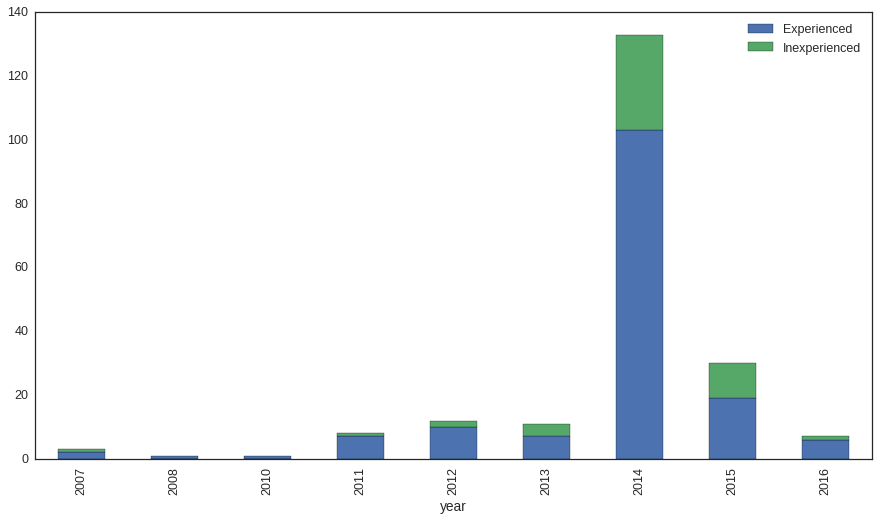

In [15]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,8), facecolor='w', edgecolor='k')

#How many days (to date) is considered experienced?
threshold = 7

gt_10 = overtime_df.query("active_days_to_date>={0}".format(threshold)).groupby('year').aggregate({'uid':pd.Series.nunique})
lt_10 = overtime_df.query("active_days_to_date<{0}".format(threshold)).groupby('year').aggregate({'uid':pd.Series.nunique})

gt_10.columns = ['Experienced']
lt_10.columns = ['Inexperienced']

gt_10.join(lt_10).plot(ax=axs,kind='bar',stacked=True)

# 2: User Experience 

Who's Mapping Buildings and Roads?

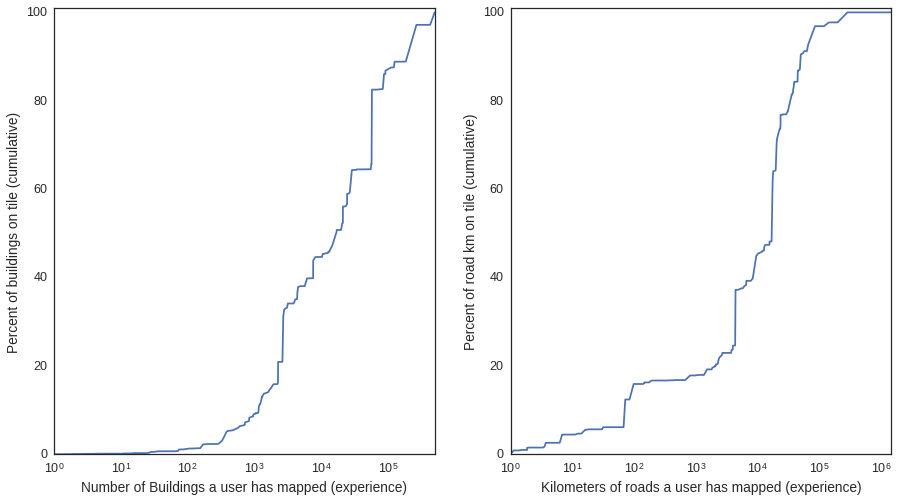

In [16]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,8), facecolor='w', edgecolor='k')

b_view = current_tile_df.sort_values(by='total_buildings_ever')
b_view['cumulative_percent'] = b_view.percent_tile_buildings.cumsum()

b_view.plot(ax=axs[0],x='total_buildings_ever',y='cumulative_percent', logx=True,legend=None)

axs[0].set_ylabel('Percent of buildings on tile (cumulative)')
axs[0].set_xlabel('Number of Buildings a user has mapped (experience)')


r_view = current_tile_df.sort_values(by='total_road_km_ever')
r_view['cumulative_percent'] = r_view.percent_tile_road_km.cumsum()

r_view.plot(ax=axs[1],x='total_road_km_ever',y='cumulative_percent', logx=True,legend=None)

axs[1].set_ylabel('Percent of road km on tile (cumulative)')
axs[1].set_xlabel('Kilometers of roads a user has mapped (experience)')

for ax in axs:
    ax.set_ylim(0,101)
    ax.set_xlim(1)

# 3. User Focus

Study Tile: 14% of contributors have more than 25% of their edits on this tile
Compare Tile: 13% of contributors have more than 25% of their edits on this tile
----
Study Tile: 1% of experienced contributors have more than 20% of their edits on this tile
Compare Tile: 6% of experienced contributors have more than 20% of their edits on this tile


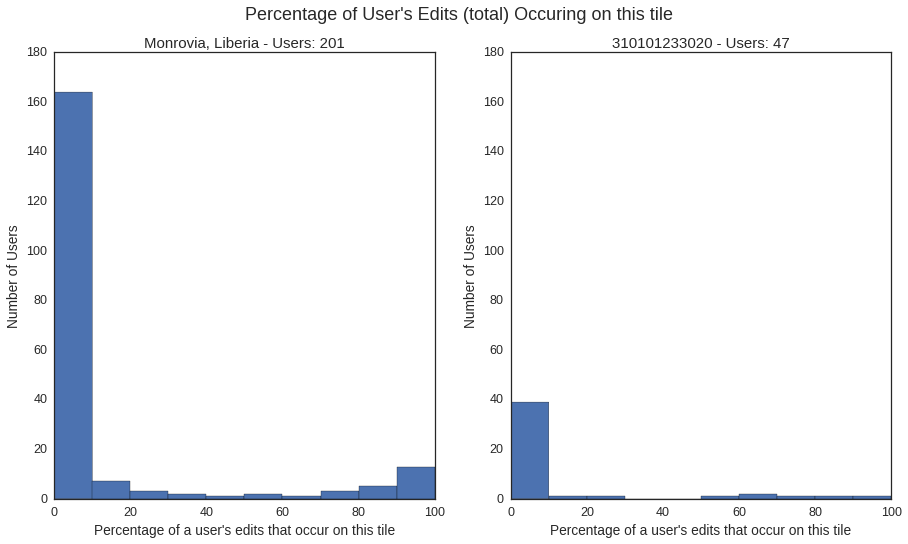

In [45]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,8), facecolor='w', edgecolor='k')

current_tile_df.plot(ax=axs[0], kind='hist',y=['percent_user_edits'], legend=None, bins=np.arange(0,101,10))
axs[0].set_title(study_tiles[study_tile_idx]['name'] + " - Users: "+str(len(current_tile_df)))

compare_tile_df.plot(ax=axs[1], kind='hist',y=['percent_user_edits'], legend=None, bins=np.arange(0,101,10))
axs[1].set_title(study_tiles[study_tile_idx]['compare_tiles'][idx]['quad'] + " - Users: "+str(len(compare_tile_df)))

axs[1].set_ylim(axs[0].get_ylim())

for ax in axs:
    ax.set_xlabel("Percentage of a user's edits that occur on this tile")
    ax.set_ylabel('Number of Users')
plt.suptitle("Percentage of User's Edits (total) Occuring on this tile",fontsize=18)

print("Study Tile: {0:.0f}% of contributors have more than 25% of their edits on this tile".format(len(current_tile_df.query('percent_user_edits>25')) / len(current_tile_df)*100))
print("Compare Tile: {0:.0f}% of contributors have more than 25% of their edits on this tile".format(len(compare_tile_df.query('percent_user_edits>25')) / len(compare_tile_df)*100))
print("----")
print("Study Tile: {0:.0f}% of experienced contributors have more than 20% of their edits on this tile".format(len(current_tile_df.query('total_editing_days_ever>7').query('percent_user_edits>20')) / len(current_tile_df.query('total_editing_days_ever>7'))*100))
print("Compare Tile: {0:.0f}% of experienced contributors have more than 20% of their edits on this tile".format(len(compare_tile_df.query('total_editing_days_ever>7').query('percent_user_edits>20')) / len(compare_tile_df.query('total_editing_days_ever>7'))*100))

## Analysis
We should expect to see this type of distribution from a tile that underwent a disaster mapping event. There are many users with low percentage of their edits occuring on this tile, these are likely the experienced users who dropped by to participate in the event.  Likewise, we see users with 100% of their edits occuring on this tile, likely the users who signed up to participate in the event and have not been active otherwise.

<br>
<hr>
<br>
<br>
# Run Tile-by-Tile Comparisons
For each study tile, we have _comparable_ tiles, these are the tiles of most interest, because the difference in patterns between these tiles and our study tiles is what makes the analysis.

#### 1. Get a _comparable_ tile

[The Comparable tile for Monrovia is here](http://epic-analytics.cs.colorado.edu:9000/jennings/iscram/Monrovia%2c%20Liberia_sim_tiles.geojson), in Indonesia

In [18]:
if 'compare_tiles' in study_tiles[study_tile_idx]:
    print("Comparable Tiles for {0}: ".format(study_tiles[study_tile_idx]['name']))
    for idx, compare in enumerate(study_tiles[study_tile_idx]['compare_tiles']):
        print("\t{0}, '{1}'".format(idx, compare['quad']))

Comparable Tiles for Monrovia, Liberia: 
	0, '310101233020'


In [19]:
#Which tile to compare? (from within the comparable study tiles)
compare_tile_idx=0

#### 2. Get Users
If it crashes, just run it again

In [22]:
reset()
study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['user_list'] = get_all_users_who_edited_tile(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx])

2005 . 2006 . 2007 . 2008 . 2009 . 2010 . 2011 . 2012 . 2013 . 2014 . 2015 . 2016 . 

#### 3. Build actual user distribution (may take a few minutes)
If it fails, run the above cell again (probably twice)

In [23]:
study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['users'] = build_user_distributions(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['user_list'])

 167/ ~ 226

#### 4. Now process user focus for compare tiles

In [24]:
process_dictionary_of_users(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['users'])
process_dictionary_of_users_for_study_tile_stats(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['users'], study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['quad'])

display.display(study_tiles[study_tile_idx]['users'][study_tiles[study_tile_idx]['user_list'][0]]['toi'].head(2))
display.display(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['users'][study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['user_list'][0]]['tiles'].head(2))
display.display(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['users'][study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['user_list'][0]]['annual'].head(2))

 45/47

,quadkey,year,uid,buildings,road_km,amenities,edits,num_days,user_stats_uid,user_name,total_year,total_buildings,total_road_km,total_amenities,total_edits,total_active_days
3038,033330222101,2014,1611,57,2.13397,0,67,1,1611,Harry Wood,2014,2153,730.646,387,4430,131


,edits,amenities,road_km,num_days,buildings,percent_user_road_km,percent_user_buildings,percent_user_amenities,percent_user_edits
quadkey,,,,,,,,,
023012311301,1,0,0.0,1,0,0.0,0.0,0.0,0.006085
023012311303,4,0,0.0,1,0,0.0,0.0,0.0,0.024338


,uid,user_name,year,total_buildings,total_road_km,total_amenities,total_edits,total_active_days
0,7749,Matze,2007,0,791.482,18,14391,44
1,7749,Matze,2008,4,129.122,31,1479,34


#### 5. Build Compare Tile Full Stats

In [25]:
compare_tile_df = build_all_stats_for_tile(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx])
compare_tile_df.count().head(2)

edits        47
amenities    47
dtype: int64

In [26]:
compare_overtime_df = get_active_users_overtime_df(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['users'])
compare_overtime_df.head(2)

,quadkey,year,uid,buildings,road_km,amenities,edits,num_days,user_stats_uid,user_name,total_year,total_buildings,total_road_km,total_amenities,total_edits,total_active_days,active_days_to_date
0,310101233020,2016,72235,0,0.0,0,3,1,72235,Basstoelpel,2016,3034,655.51,136,66630,177,2239
1,310101233020,2015,617220,2,0.0,0,2,2,617220,raniedwianugrah,2015,40241,3667.23,697,47568,88,256


<br>
<br>
<hr>

# Now we can compare Monrovia to its similar tiles

First, basic stats: 

In [27]:
print("Users on Study Tile: {0}, {1}".format(len(study_tiles[study_tile_idx]['user_list']), len(current_tile_df)))
print("Users on Compare Tile: {0}, {1}".format(len(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['user_list']), len(compare_tile_df)))

Users on Study Tile: 201, 201
Users on Compare Tile: 47, 47


# 1.  Users active on the tiles overtime

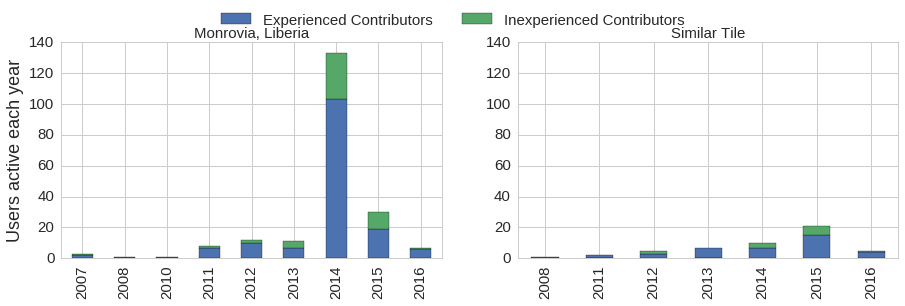

In [33]:
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,6), facecolor='w', edgecolor='k')
plt.subplots_adjust(left=None, bottom=0.4, right=None, top=None, wspace=None, hspace=0.1)

#How many days (to date) is considered experienced?
threshold = 7
#Study Tile
gt_10 = overtime_df.query("active_days_to_date>={0}".format(threshold)).groupby('year').aggregate({'uid':pd.Series.nunique})
lt_10 = overtime_df.query("active_days_to_date<{0}".format(threshold)).groupby('year').aggregate({'uid':pd.Series.nunique})
gt_10.columns = ['Experienced Contributors']
lt_10.columns = ['Inexperienced Contributors']
gt_10.join(lt_10).plot(ax=axs[0],kind='bar',stacked=True)

#Compare DF
compare_gt_10 = compare_overtime_df.query("active_days_to_date>={0}".format(threshold)).groupby('year').aggregate({'uid':pd.Series.nunique})
compare_lt_10 = compare_overtime_df.query("active_days_to_date<{0}".format(threshold)).groupby('year').aggregate({'uid':pd.Series.nunique})
compare_gt_10.columns = ['Experienced Contributors']
compare_lt_10.columns = ['Inexperienced Contributors']
compare_gt_10.join(compare_lt_10).plot(ax=axs[1],kind='bar',stacked=True)

axs[0].set_title(study_tiles[study_tile_idx]['name'],fontsize=15)
axs[0].set_ylabel("Users active each year",fontsize=18)
axs[1].set_title("Similar Tile",fontsize=15)

axs[1].set_ylim(axs[0].get_ylim())

for ax in axs:
    ax.legend_.remove()
    ax.set_xlabel("")

handles, labels = axs[1].get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper center', ncol=2, fontsize=15)

# Percentage of a User's Edits on Each Tile

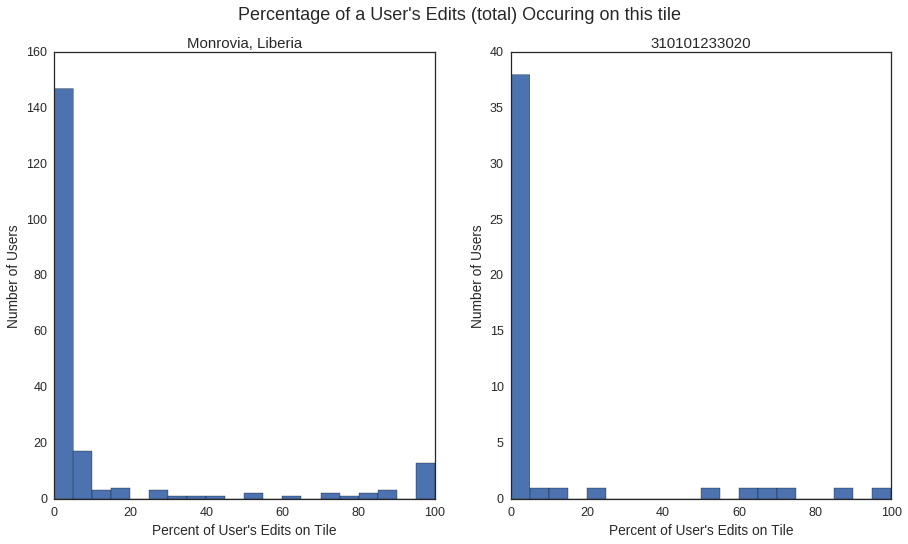

In [29]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,8), facecolor='w', edgecolor='k')

current_tile_df.plot(ax=axs[0], kind='hist',y=['percent_user_edits'], legend=None, bins=np.arange(0,101,5))
axs[0].set_title(study_tiles[study_tile_idx]['name'])

compare_tile_df.plot(ax=axs[1], kind='hist',y=['percent_user_edits'], legend=None, bins=np.arange(0,101,5))
axs[1].set_title(study_tiles[study_tile_idx]['compare_tiles'][idx]['quad'])

for ax in axs:
    ax.set_xlabel("Percent of User's Edits on Tile")
    ax.set_ylabel('Number of Users')
plt.suptitle("Percentage of a User's Edits (total) Occuring on this tile",fontsize=18)
None

# User Experience
## Compare Buildings & Roads Across Two _Similar_ Tiles

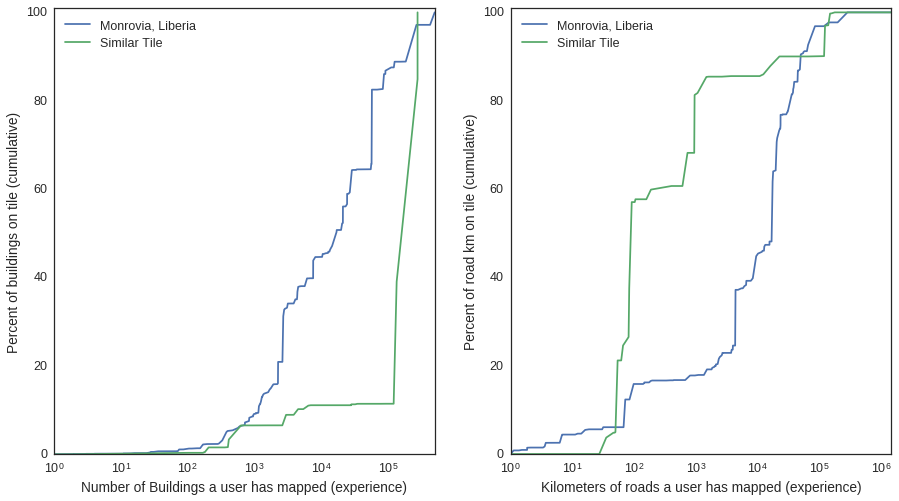

In [30]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,8), facecolor='w', edgecolor='k')

#Buildings
b_axis = axs[0]
b_view = current_tile_df.sort_values(by='total_buildings_ever')
b_view['cumulative_percent'] = b_view.percent_tile_buildings.cumsum()
b_view.plot(ax=b_axis,x='total_buildings_ever',y='cumulative_percent', logx=True,label=study_tiles[study_tile_idx]['name'])

compare_b_view = compare_tile_df.sort_values(by='total_buildings_ever')
compare_b_view['cumulative_percent'] = compare_b_view.percent_tile_buildings.cumsum()
compare_b_view.plot(ax=b_axis,x='total_buildings_ever',y='cumulative_percent', logx=True,label="Similar Tile")

b_axis.set_ylabel('Percent of buildings on tile (cumulative)')
b_axis.set_xlabel('Number of Buildings a user has mapped (experience)')

#Roads
r_axis = axs[1]
r_view = current_tile_df.sort_values(by='total_road_km_ever')
r_view['cumulative_percent'] = r_view.percent_tile_road_km.cumsum()
r_view.plot(ax=r_axis,x='total_road_km_ever',y='cumulative_percent', logx=True,label=study_tiles[study_tile_idx]['name'])

compare_r_view = compare_tile_df.sort_values(by='total_road_km_ever')
compare_r_view['cumulative_percent'] = compare_r_view.percent_tile_road_km.cumsum()
compare_r_view.plot(ax=r_axis,x='total_road_km_ever',y='cumulative_percent', logx=True,label="Similar Tile")

r_axis.set_ylabel('Percent of road km on tile (cumulative)')
r_axis.set_xlabel('Kilometers of roads a user has mapped (experience)')

for ax in [r_axis, b_axis]:
    ax.set_ylim(0,101)
    ax.set_xlim(1)

## Analysis
This is really exciting to see. These distributions are very, very different. There is a steep, steep jump at the end of the buildings, meaning that most of the buildings on the tile were contributed by users who have contributed A LOT of buildings.

On the other hand, when it comes to roads, the similar tile has the opposite distribution

In [46]:
study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['quad']

'310101233020'